# Analysis of model results and embedding experiment

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.metrics import accuracy_score
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras import layers, models, Sequential, Input, Model
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.data.experimental import cardinality
from tensorflow.data.experimental import AUTOTUNE
from tensorflow.keras.models import load_model

## Load model and results analysis

In [2]:
#model = load_model('../models/20201210_170338_VGG16_v2_0/')
model = load_model('../models/Full_training/20201211_202203_VGG16_v3_4/')
model.summary()

Model: "functional_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
tf_op_layer_strided_slice_3  (None, 224, 224, 3)       0         
_________________________________________________________________
tf_op_layer_BiasAdd_3 (Tenso (None, 224, 224, 3)       0         
_________________________________________________________________
sequential_6 (Sequential)    (None, 50)                15969138  
_________________________________________________________________
dense_7 (Dense)              (None, 12)                612       
Total params: 15,969,750
Trainable params: 15,969,750
Non-trainable params: 0
_________________________________________________________________


In [3]:
path0 = r'C:\Users\pitip\OneDrive\Bureau\raw_data\Clean_Data\Test_small'

In [4]:
test_dir = path0

BATCH_SIZE = 32
IMG_SIZE = (224, 224)

test_dataset = image_dataset_from_directory(test_dir, shuffle=False, batch_size=BATCH_SIZE, image_size=IMG_SIZE, label_mode='categorical')

class_names = test_dataset.class_names
n_artist = len(class_names)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)
print('Number of test batches: %d' % cardinality(test_dataset))

Found 58 files belonging to 12 classes.
Number of test batches: 2


In [5]:
loss, accuracy = model.evaluate(test_dataset)
print('Test accuracy :', accuracy)

2/2 [==============================] - 16s 7s/step - loss: 10.1335 - accuracy: 0.8621
Test accuracy : 0.8620689511299133


In [6]:
predictions = model.predict(test_dataset)

In [7]:
predictions.shape

(58, 12)

In [8]:
np.argmax(predictions, axis =1)

array([10,  0,  0,  0,  0,  2,  1,  1,  5,  5,  2,  2,  2,  2,  2,  3,  3,
        3,  3,  3,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  6,  6,  7,  6,
        6,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9, 10,
       10, 10, 10,  2,  0, 11,  0], dtype=int64)

In [9]:
label = np.concatenate([label for im, label in test_dataset])
label

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.,

In [10]:
np.array(label).shape

(58, 12)

In [11]:
np.argmax(label, axis=1)

array([ 0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  3,  3,
        3,  3,  3,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  6,  6,  6,  6,
        6,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9, 10,
       10, 10, 10, 11, 11, 11, 11], dtype=int64)

In [12]:
np.sum(np.argmax(predictions, axis =1) == np.argmax(label, axis=1))/len(np.argmax(label, axis=1))

0.8620689655172413

In [13]:
predictions[0]

array([1.2005321e-17, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 4.9595386e-26, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 0.0000000e+00],
      dtype=float32)

OK : able to retrieve prediction and artist, using image_dataset_from_directory

## Test 1 image by 1

In [14]:
n_art = 9
n_im = 3

In [15]:
folder = os.path.join(path0, f"_{n_art}")
file_list = os.listdir(folder)
image_to_predict = os.path.join(path0, f"_{n_art}", file_list[n_im])
print(image_to_predict)
im_224 = load_img(image_to_predict, grayscale=False, color_mode='rgb', target_size=(224, 224), interpolation='bilinear')
im_224 = np.array(im_224.getdata()).reshape(im_224.size[0], im_224.size[1], 3)
im_224 = np.expand_dims(im_224, axis = 0)

C:\Users\pitip\OneDrive\Bureau\raw_data\Clean_Data\Test_small\_9\521.jpg


In [16]:
pred = model.predict(im_224)
proba = pred[0]
print(proba)
artiste_index = np.argmax(pred[0])
print(class_names[artiste_index])


[1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 1.0049157e-34 1.3756078e-33]
_1


OK : able to correctly identify artist, most of the time

## Clean implementation

In [17]:
test_dir = path0

BATCH_SIZE = 32
IMG_SIZE = (224, 224)

test_dataset = image_dataset_from_directory(test_dir, shuffle=False, batch_size=BATCH_SIZE, image_size=IMG_SIZE, label_mode='categorical')

class_names = test_dataset.class_names
n_artist = len(class_names)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)
print('Number of test batches: %d' % cardinality(test_dataset))

label = np.concatenate([lab for im, lab in test_dataset])
artist_id = [class_names[i] for i in np.argmax(label, axis=1)]
artist_id[::10]

Found 58 files belonging to 12 classes.
Number of test batches: 2


['_1', '_11', '_2', '_4', '_6', '_8']

In [18]:
predictions = model.predict(test_dataset)
predict_artist_id = [class_names[i] for i in np.argmax(predictions, axis=1)]
predict_artist_id[::10]

['_8', '_11', '_2', '_4', '_6', '_8']

In [19]:
results_comp_df = pd.DataFrame({'artist_class':artist_id, 'predicted_artist_class':predict_artist_id})
results_comp_df.head(10)

,artist_class,predicted_artist_class
0,_1,_8
1,_1,_1
2,_1,_1
3,_1,_1
4,_1,_1
5,_10,_11
6,_10,_10
7,_10,_10
8,_10,_3
9,_10,_3


## Predict from one directory

In [20]:
test_dir2 = os.path.join(path0+'2')
img_list =os.listdir(test_dir2+'\_1')
test_dataset2 = image_dataset_from_directory(test_dir2, shuffle=False, batch_size=BATCH_SIZE, image_size=IMG_SIZE, label_mode='int', 
                                             labels=img_list, interpolation='nearest')

class_names2 = test_dataset2.class_names
print('Number of test batches: %d' % cardinality(test_dataset2))

Found 10 files belonging to 1 classes.
Number of test batches: 1


In [21]:
img_list

['1105.jpg',
 '13.jpg',
 '1558.jpg',
 '1703.jpg',
 '1758.jpg',
 '3094.jpg',
 '5452.jpg',
 '5492.jpg',
 '949.jpg',
 '971.jpg']

In [22]:
predictions2 = model.predict(test_dataset2)
predict_artist_id2 = [class_names[i] for i in np.argmax(predictions2, axis=1)]
predict_artist_id2

['_8', '_1', '_1', '_1', '_2', '_2', '_2', '_2', '_2', '_1']

In [23]:
predictions2

array([[2.3219415e-22, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 3.9522170e-12, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 6.2655872e-36, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 1.3158445e-38, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        9.8759187e-09, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 3.2567621e-21, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000

In [24]:
proba_list = []
for img in img_list:
    image_to_predict = os.path.join(path0+'2', f"_{1}", img)
    print(image_to_predict)
    im_224 = load_img(image_to_predict, grayscale=False, color_mode='rgb', target_size=(224, 224), interpolation='nearest')
    im_224 = np.array(im_224.getdata()).reshape(im_224.size[0], im_224.size[1], 3)
    im_224 = np.expand_dims(im_224, axis = 0)
    pred = model.predict(im_224)
    proba = pred[0]
    print(proba)
    artiste_index = np.argmax(pred[0])
    print(class_names[artiste_index])
    proba_list.append(proba)

C:\Users\pitip\OneDrive\Bureau\raw_data\Clean_Data\Test_small2\_1\1105.jpg
[1.0796878e-22 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 1.1357380e-12 0.0000000e+00 0.0000000e+00 0.0000000e+00
 1.0000000e+00 0.0000000e+00]
_8
C:\Users\pitip\OneDrive\Bureau\raw_data\Clean_Data\Test_small2\_1\13.jpg
[1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 1.7872281e-37 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00]
_1
C:\Users\pitip\OneDrive\Bureau\raw_data\Clean_Data\Test_small2\_1\1558.jpg
[1.0000000e+00 0.0000000e+00 6.6572497e-37 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00]
_1
C:\Users\pitip\OneDrive\Bureau\raw_data\Clean_Data\Test_small2\_1\1703.jpg
[1.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 6.477993e-10
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 4.013901e-21 0.000000e+00]
_1
C:\Users\pitip

In [25]:
np.array(proba_list)

array([[1.0796878e-22, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 1.1357380e-12, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 1.7872281e-37, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 6.6572497e-37, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        6.4779931e-10, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 4.0139012e-21, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000

In [26]:
predictions2

array([[2.3219415e-22, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 3.9522170e-12, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 6.2655872e-36, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 1.3158445e-38, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        9.8759187e-09, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 3.2567621e-21, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000

In [27]:
print(np.argmax(predictions2, axis=1))
print(np.argmax(np.array(proba_list), axis=1))

[10  0  0  0  4  4  4  4  4  0]
[10  0  0  0  4  4  4  4  4  0]


In [28]:
print(predictions2[-2])
print(np.array(proba_list)[-2])

[0.0000000e+00 0.0000000e+00 0.0000000e+00 1.0289068e-28 1.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 2.8181538e-10 3.1870411e-28
 0.0000000e+00 0.0000000e+00]
[0.0000000e+00 0.0000000e+00 1.8030534e-38 5.6692858e-28 9.9604106e-01
 0.0000000e+00 0.0000000e+00 0.0000000e+00 3.9589517e-03 1.8292849e-21
 0.0000000e+00 0.0000000e+00]


## Compare raw data from both load method

array([[232, 240, 235, 235, 232, 238, 231, 229, 226, 223],
       [234, 228, 226, 235, 244, 231, 236, 236, 237, 234],
       [237, 235, 237, 228, 236, 229, 234, 225, 232, 230],
       [236, 232, 237, 233, 238, 232, 237, 223, 231, 235],
       [229, 239, 239, 229, 249, 231, 228, 227, 236, 236],
       [242, 237, 243, 234, 239, 231, 228, 233, 237, 228],
       [228, 234, 242, 237, 237, 230, 245, 232, 216, 222],
       [244, 233, 226, 231, 234, 237, 233, 233, 228, 220],
       [236, 233, 234, 227, 228, 229, 231, 231, 220, 223],
       [241, 236, 238, 232, 222, 227, 228, 228, 220, 218]])

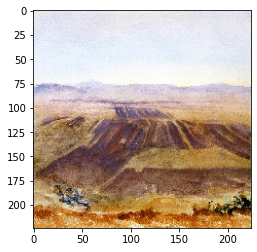

In [29]:
image_to_predict = os.path.join(path0+'2', f"_{1}", img_list[0])
im_li = load_img(image_to_predict, grayscale=False, color_mode='rgb', target_size=(224, 224), interpolation='nearest')
plt.imshow(im_li);
im_li = np.array(im_li.getdata()).reshape(im_li.size[0], im_li.size[1], 3)
im_li[0:10,0:10,0]

In [30]:
test_dataset2 = image_dataset_from_directory(test_dir2, shuffle=False, batch_size=BATCH_SIZE, image_size=IMG_SIZE, label_mode='int', 
                                             labels=img_list, interpolation='nearest')
image_dfd_list = [im for im, lab in test_dataset2]

Found 10 files belonging to 1 classes.


array([[231, 240, 235, 235, 231, 238, 231, 228, 226, 222],
       [234, 227, 226, 234, 244, 231, 235, 235, 236, 233],
       [237, 235, 237, 227, 235, 229, 233, 224, 232, 230],
       [236, 232, 236, 233, 237, 232, 237, 223, 231, 235],
       [228, 238, 239, 228, 248, 230, 225, 224, 236, 236],
       [242, 237, 243, 234, 238, 231, 225, 230, 235, 228],
       [228, 234, 241, 237, 236, 230, 243, 230, 213, 222],
       [243, 232, 225, 230, 234, 237, 230, 231, 226, 219],
       [236, 233, 234, 227, 227, 229, 228, 228, 218, 223],
       [241, 236, 237, 229, 220, 225, 226, 226, 217, 216]], dtype=uint8)

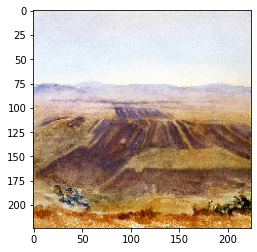

In [31]:
im_dfd = np.array(image_dfd_list[0][0])
plt.imshow(im_dfd);
im_dfd[0:10,0:10,0]

In [32]:
np.sum(im_dfd!=im_li)

100842

In [33]:
np.sqrt(np.sum((im_dfd-im_li)**2)/im_li.size)

1.421415298155304

Found 10 files belonging to 1 classes.
bilinear
Nb of different pixels: 150301
Distance: 7.369
Found 10 files belonging to 1 classes.
nearest
Nb of different pixels: 99068
Distance: 1.374
Found 10 files belonging to 1 classes.
bicubic
Nb of different pixels: 150528
Distance: 7.337


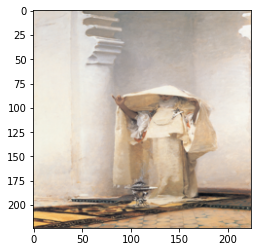

In [34]:
n_im = 1
int_met = ['bilinear', 'nearest', 'bicubic']
image_to_predict = os.path.join(path0+'2', f"_{1}", img_list[n_im])
for met in int_met:
    test_dataset2 = image_dataset_from_directory(test_dir2, shuffle=False, batch_size=BATCH_SIZE, image_size=IMG_SIZE, label_mode='int', 
                                             labels=img_list, interpolation=met)
    image_dfd_list = [im for im, lab in test_dataset2]
    im_dfd = np.array(image_dfd_list[0][n_im])
    im_li = load_img(image_to_predict, grayscale=False, color_mode='rgb', target_size=(224, 224), interpolation=met)
    plt.imshow(im_li);
    im_li = np.array(im_li.getdata()).reshape(im_li.size[0], im_li.size[1], 3)
    
    print(met)
    print(f"Nb of different pixels: {np.sum(im_dfd!=im_li)}")
    print(f"Distance: {np.sqrt(np.sum((im_dfd-im_li)**2)/im_li.size):.3f}")

Differences in the way the images are loaded with both models

## Play with embeddings

In [35]:
layer_outputs = [model.layers[-1].input]
embedding_model = models.Model(inputs=model.input, outputs=layer_outputs)

In [36]:
embedding_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
tf_op_layer_strided_slice_3  (None, 224, 224, 3)       0         
_________________________________________________________________
tf_op_layer_BiasAdd_3 (Tenso (None, 224, 224, 3)       0         
_________________________________________________________________
sequential_6 (Sequential)    (None, 50)                15969138  
Total params: 15,969,138
Trainable params: 15,969,138
Non-trainable params: 0
_________________________________________________________________


In [37]:
test_dir2 = os.path.join(path0+'2')
img_list =os.listdir(test_dir2+'\_1')
test_dataset2 = image_dataset_from_directory(test_dir2, shuffle=False, batch_size=BATCH_SIZE, image_size=IMG_SIZE, label_mode='int', 
                                             labels=img_list, interpolation='bilinear')

class_names2 = test_dataset2.class_names
img_list

Found 10 files belonging to 1 classes.


['1105.jpg',
 '13.jpg',
 '1558.jpg',
 '1703.jpg',
 '1758.jpg',
 '3094.jpg',
 '5452.jpg',
 '5492.jpg',
 '949.jpg',
 '971.jpg']

In [38]:
test_dir_1im = os.path.join(path0+'_1im')
img_list_1im =os.listdir(test_dir_1im+'\_1')
test_dataset_1im = image_dataset_from_directory(test_dir_1im, shuffle=False, batch_size=BATCH_SIZE, image_size=IMG_SIZE, label_mode='int', 
                                             labels=img_list_1im, interpolation='bilinear')

img_list_1im

Found 10 files belonging to 1 classes.


['12798.jpg',
 '21748.jpg',
 '23053.jpg',
 '3023.jpg',
 '37130.jpg',
 '42360.jpg',
 '45150.jpg',
 '6426.jpg',
 '76841.jpg',
 '94646.jpg']

In [39]:
image_embeddings = embedding_model.predict(test_dataset2)
image_embeddings.shape

(10, 50)

In [40]:
image_embeddings_1im = embedding_model.predict(test_dataset_1im)
image_embeddings_1im

array([[ 2.32091267e-02, -1.91515040e+00, -5.22968903e+01,
         6.20149384e+01,  4.11841965e+01, -3.72732086e+01,
        -3.62674093e+00,  4.03092613e+01, -3.78652725e+01,
         6.85809174e+01, -5.01740723e+01, -2.07487755e+01,
        -3.40230904e+01,  4.87166557e+01, -2.44470997e+01,
         2.82400360e+01, -5.50455933e+01, -6.15531206e+00,
        -3.58814507e+01,  3.00874448e+00, -2.33914242e+01,
         3.68191757e+01, -6.76659546e+01,  7.61574631e+01,
        -6.09047623e+01,  3.77688904e+01, -3.17715931e+01,
        -8.89496765e+01,  6.91141033e+00,  8.43174591e+01,
        -1.93102264e+01,  2.48716240e+01, -6.50360031e+01,
         4.00356216e+01, -1.93732567e+01, -6.13075066e+01,
         5.45299721e+01, -2.69505692e+00, -3.11194897e+01,
        -1.06257753e+01,  5.01295433e+01,  1.45579445e+00,
         3.80199928e+01,  6.51994934e+01, -1.63540154e+01,
         5.92801323e+01, -1.05564003e+02, -1.06655525e+02,
         1.79631081e+01,  6.95673447e+01],
       [ 3.61

In [41]:
dist_list = []
for i in range(len(image_embeddings)):
    dist_list.append(np.sqrt(np.sum((image_embeddings[i] - image_embeddings_1im[0])**2)))
dist_list

[433.5762,
 360.6631,
 480.49506,
 558.7322,
 466.49936,
 541.49316,
 612.96936,
 414.54962,
 480.42087,
 542.4156]

In [42]:
img_list[np.argmin(dist_list)]

'13.jpg'

## Let's scale up a bit...

In [43]:
test_dir = r'C:\Users\pitip\OneDrive\Bureau\raw_data\Clean_Data\Test'

In [44]:
%%time
layer_outputs = [model.layers[-1].input]
embedding_model = models.Model(inputs=model.input, outputs=layer_outputs)

test_dir = r'C:\Users\pitip\OneDrive\Bureau\raw_data\Clean_Data\Test'
img_list = []
#for dir_path in os.listdir(test_dir):
#    img_list += os.listdir(os.path.join(test_dir, dir_path))
for root, dirs, files in os.walk(test_dir, topdown=True):
    for name in files:
        img_list.append(os.path.join(name))
test_dataset = image_dataset_from_directory(test_dir, shuffle=False, batch_size=BATCH_SIZE, image_size=IMG_SIZE, label_mode='int', 
                                             labels=img_list, interpolation='bilinear')

image_embeddings = embedding_model.predict(test_dataset)
image_embeddings.shape

Found 1390 files belonging to 12 classes.
Wall time: 6min 9s


(1390, 50)

In [45]:
test_dir_1im = os.path.join(path0+'_1im')
img_list_1im =os.listdir(test_dir_1im+'\_1')
#test_dataset_1im = image_dataset_from_directory(test_dir_1im, shuffle=False, batch_size=BATCH_SIZE, image_size=IMG_SIZE, label_mode='int', 
#                                             labels=img_list_1im, interpolation='bilinear')

image_to_predict = os.path.join(test_dir_1im, '_1', img_list_1im[1])
im_li = load_img(image_to_predict, grayscale=False, color_mode='rgb', target_size=(224, 224), interpolation='bilinear')
im_li = np.array(im_li.getdata()).reshape(im_li.size[0], im_li.size[1], 3)
im_li = np.expand_dims(im_li,axis =0)
print(img_list_1im)
image_embeddings_1im = embedding_model.predict(im_li)
image_embeddings_1im.shape

['12798.jpg', '21748.jpg', '23053.jpg', '3023.jpg', '37130.jpg', '42360.jpg', '45150.jpg', '6426.jpg', '76841.jpg', '94646.jpg']


(1, 50)

In [46]:
#predict_image = []
#for j in range(len(img_list_1im)):
#    dist_list = []
#    for i in range(len(image_embeddings)):
#        dist_list.append(np.sqrt(np.sum((image_embeddings[i] - image_embeddings_1im[j])**2)))
#    print(np.min(dist_list))
#    predict_image.append(img_list[np.argmin(dist_list)])
#predict_image

In [47]:

dist_list = []
for i in range(len(image_embeddings)):
    dist_list.append(np.sqrt(np.sum((image_embeddings[i] - image_embeddings_1im[0])**2)))
print(np.min(dist_list))
img_list[np.argmin(dist_list)]


88.04377


'48262.jpg'

In [48]:
len(dist_list)

1390

## Test avec images extérieures

In [49]:
test_dir_imext = r'C:\Users\pitip\OneDrive\Bureau\raw_data\Donnees_tests\Données tests\Picasso'
img_list_imext =os.listdir(test_dir_imext+'\_1')
test_dataset_imext = image_dataset_from_directory(test_dir_imext, shuffle=False, batch_size=BATCH_SIZE, image_size=IMG_SIZE, label_mode='int', 
                                             labels=img_list_imext, interpolation='bilinear')


print(img_list_imext)
image_embeddings_imext = embedding_model.predict(test_dataset_imext)
image_embeddings_imext.shape

Found 7 files belonging to 1 classes.
['32688_xl.jpg', '711K+aMaSGL._AC_SX466_.jpg', '71L7b+wAQkL._AC_SL1000_.jpg', 'Detournement-Femme-livre-Pablo-Picasso-publicite-812x700.jpg', 'images.jpg', 'STVLCRTKQGOJWUKAV5JFAI77GA.jpg', 'tableaux-sur-toile-le-reve-de-pablo-picasso.jpg']


(7, 50)

288.05878
293.69894
131.29103
200.83205
297.48233
263.31235
261.3419


['60330.jpg',
 '88756.jpg',
 '60330.jpg',
 '4499.jpg',
 '86332.jpg',
 '101093.jpg',
 '10521.jpg']

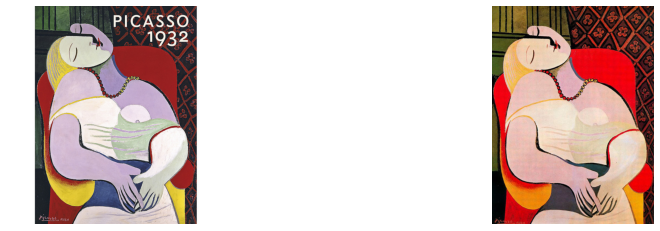

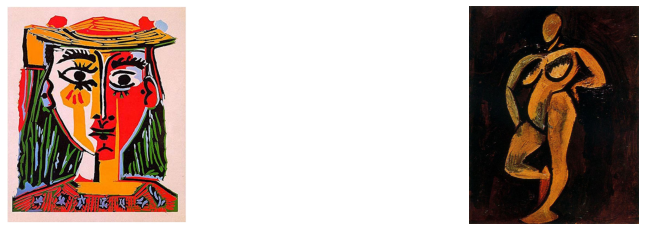

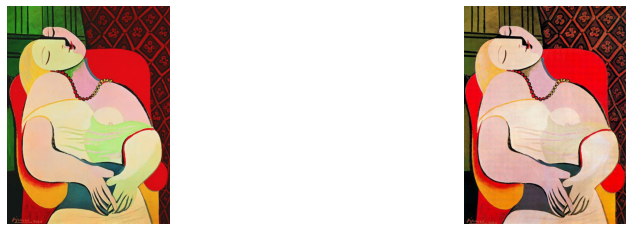

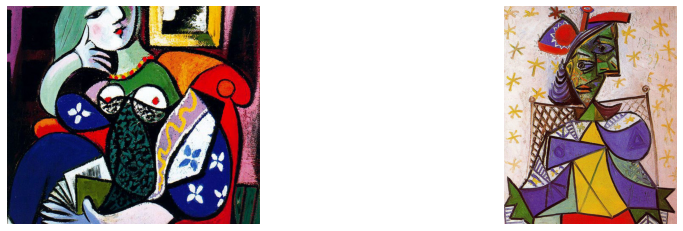

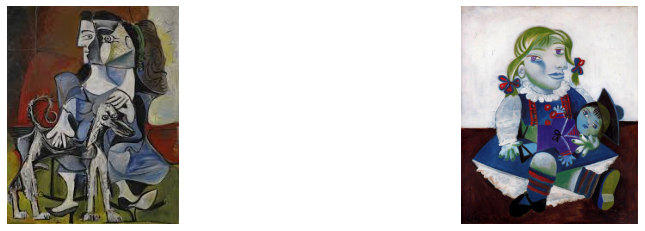

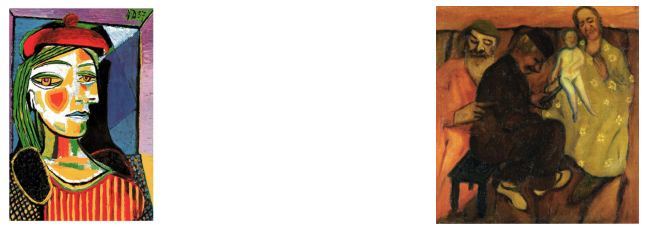

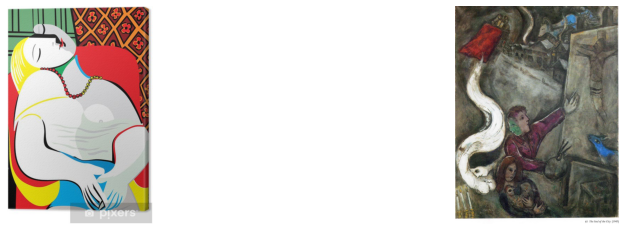

In [50]:
predict_image = []
for j in range(len(img_list_imext)):
    fig, ax = plt.subplots(1, 2, figsize=(15,4))
    img = plt.imread(os.path.join(test_dir_imext, '_1', img_list_imext[j]))
    ax[0].imshow(img)
    ax[0].axis('off')
    
    dist_list = []
    for i in range(len(image_embeddings)):
        dist_list.append(np.sqrt(np.sum((image_embeddings[i] - image_embeddings_imext[j])**2)))
    print(np.min(dist_list))
    predict_image.append(img_list[np.argmin(dist_list)])
    
    for k in range(1, 13):
        path_img = os.path.join(test_dir, f"_{k}", img_list[np.argmin(dist_list)])
        if os.path.isfile(path_img):
            img_orig = plt.imread(path_img)
            ax[1].imshow(img_orig)
            ax[1].axis('off')
predict_image

249.83855
226.92781
222.77187
229.52106
247.6668
264.82468
237.1448


['87166.jpg',
 '101621.jpg',
 '60330.jpg',
 '4499.jpg',
 '24642.jpg',
 '61052.jpg',
 '10521.jpg']

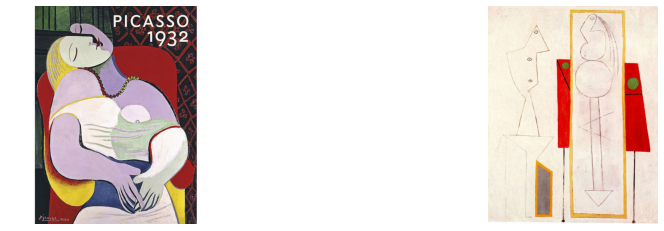

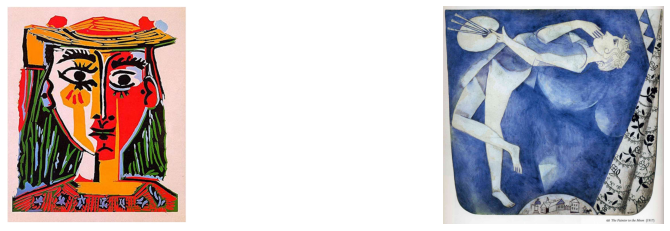

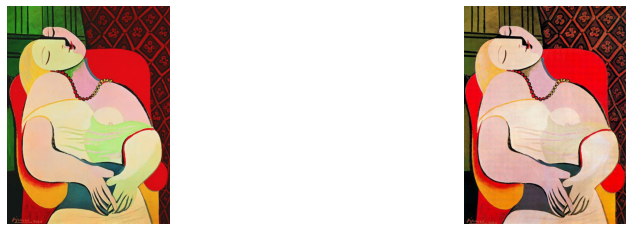

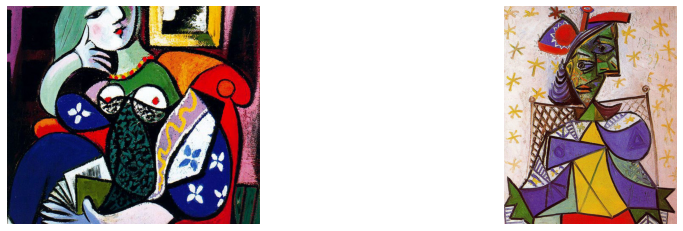

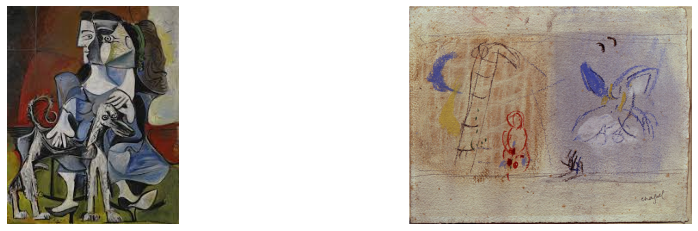

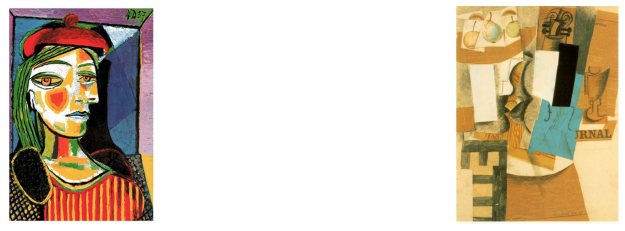

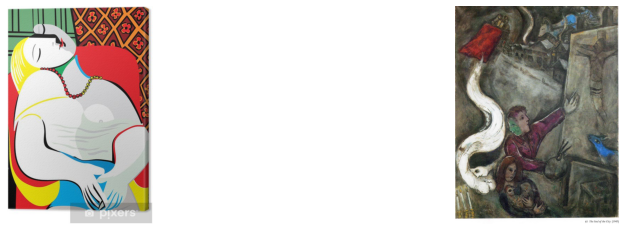

In [51]:
predict_image = []
for j in range(len(img_list_imext)):
    fig, ax = plt.subplots(1, 2, figsize=(15,4))
    img = plt.imread(os.path.join(test_dir_imext, '_1', img_list_imext[j]))
    ax[0].imshow(img)
    ax[0].axis('off')
    
    image_to_predict = os.path.join(test_dir_imext, '_1', img_list_imext[j])
    im_li = load_img(image_to_predict, grayscale=False, color_mode='rgb', target_size=(224, 224), interpolation='bilinear')
    im_li = np.array(im_li.getdata()).reshape(im_li.size[0], im_li.size[1], 3)
    im_li = np.expand_dims(im_li,axis =0)
    
    image_embeddings_imext = embedding_model.predict(im_li)
    
    dist_list = []
    for i in range(len(image_embeddings)):
        dist_list.append(np.sqrt(np.sum((image_embeddings[i] - image_embeddings_imext[0])**2)))
    print(np.min(dist_list))
    predict_image.append(img_list[np.argmin(dist_list)])
    
    for k in range(1, 13):
        path_img = os.path.join(test_dir, f"_{k}", img_list[np.argmin(dist_list)])
        if os.path.isfile(path_img):
            img_orig = plt.imread(path_img)
            ax[1].imshow(img_orig)
            ax[1].axis('off')
predict_image

## test selection images

In [52]:
for im, lab in test_dataset.take(1):
    print(im.shape)
    print(lab.shape)

(32, 224, 224, 3)
(32,)


In [53]:
label_list = np.concatenate([lab for im, lab in test_dataset])
label_list

array([b'100191.jpg', b'100948.jpg', b'101589.jpg', ..., b'95784.jpg',
       b'98440.jpg', b'99128.jpg'], dtype=object)

In [54]:
label_list_2 = [int(str(l).replace('.jpg', '').replace('b', '').replace("'", '')) for l in label_list]

In [55]:
image_list = np.concatenate([im for im, lab in test_dataset])

In [56]:
ind = np.where(np.array(label_list_2) < 2000)
ind[0]

array([   5,    8,   12,   13,  115,  134,  135,  143,  196,  226,  372,
        374,  498,  603,  615,  618,  788,  937,  938,  948,  977, 1014,
       1114, 1181, 1185, 1190, 1292, 1298, 1301, 1339], dtype=int64)

In [57]:
np.array(label_list_2)[ind[0]]

array([1105,   13, 1558, 1703,  971, 1378, 1418, 1597,  542,  774, 1198,
       1240, 1758,  949, 1335, 1553,  544,  799,   81,   87,  112,  447,
        454, 1013, 1368, 1798, 1298, 1386, 1652,  521])

In [58]:
image_list.shape

(1390, 224, 224, 3)

In [59]:
image_list2 = image_list[ind[0],:,:,:]

In [60]:
image_list2.shape

(30, 224, 224, 3)